<a href="https://colab.research.google.com/github/GRACOPORDEUS/atividades_mestrado/blob/main/1107106_220427_lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from itertools import product
import pandas as pd
import numpy as np

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### Qustão 1

**Criando base de dados**

In [105]:
def func_classes(df):

  x = df[0]
  y = df[1]
  z = df[2]

  if (x <= 0.1) & (y <= 0.1) & (z <= 0.1): Classe = 1
  elif (x <= 0.1) & (y <= 0.1) & (z >= 0.9): Classe = 2
  elif (x <= 0.1) & (y >= 0.9) & (z <= 0.1): Classe = 3
  elif (x <= 0.1) & (y >= 0.9) & (z >= 0.9): Classe = 4
  elif (x >= 0.9) & (y <= 0.1) & (z <= 0.1): Classe = 5
  elif (x >= 0.9) & (y <= 0.1) & (z >= 0.9): Classe = 6
  elif (x >= 0.9) & (y >= 0.9) & (z <= 0.1): Classe = 7
  elif (x >= 0.9) & (y >= 0.9) & (z >= 0.9): Classe = 8
  else: Classe = 0

  return Classe

Dados de treino

In [110]:
top_x = np.arange(0.85, 1, 0.01)
top_y = np.arange(0.85, 1, 0.01)
top_z = np.arange(0.85, 1, 0.01)
bot_x = np.arange(0, 0.15, 0.01)
bot_y = np.arange(0, 0.15, 0.01)
bot_z = np.arange(0, 0.15, 0.01)

x = np.array([top_x, bot_x])
y = np.array([top_y, bot_y])
z = np.array([top_z, bot_z])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

In [111]:
vertices = pd.DataFrame(product(x, y, z), columns=["x", "y", "z"]) \
    .explode("x") \
    .explode("y") \
    .explode("z") \
    .drop_duplicates() \
    .reset_index(drop=True)

vertices["classes"] = ""

In [112]:
for i in range(len(vertices)):
  df = vertices.loc[i]
  vertices.classes[i] = func_classes(df)

Dados de teste

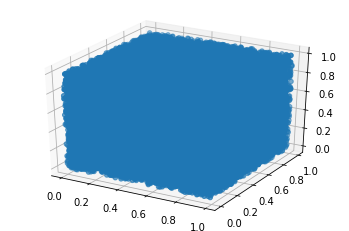

In [58]:
ax = plt.axes(projection="3d")

x_data = np.random.randint(0, 100, (100000,))/100
y_data = np.random.randint(0, 100, (100000,))/100
z_data = np.random.randint(0, 100, (100000,))/100

ax.scatter(x_data, y_data, z_data)

In [88]:
d = {"x": x_data, 
     "y": y_data, 
     "z": z_data}

test = pd.DataFrame(data = d)
test["y_test"] = ""

In [106]:
for i in range(len(test)):
  df = test.loc[i]
  test.y_test[i] = func_classes(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Modelagem**

In [115]:
X_train = vertices[["x","y","z"]]
y_train = vertices[["classes"]].astype('int')

In [116]:
n_iter = 10
eta = 0.1

model = Perceptron()

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

Testando

In [107]:
X_test = test[["x","y","z"]]
y_test = test[["y_test"]].astype('int')

In [117]:
y_pred = model.predict(X_test)

In [118]:
print(accuracy_score(y_test, y_pred))

0.99051


In [168]:
plot_test = test[test["y_test"] != 0]

plot_pred = test
plot_pred["y_pred"] = y_pred
plot_pred = plot_pred[plot_pred["y_pred"] != 0]
plot_pred = plot_pred[plot_pred["y_pred"] != plot_pred["y_test"]]

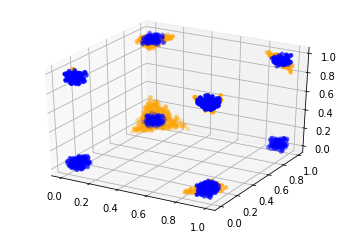

In [169]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(plot_test.x, 
           plot_test.y, 
           plot_test.z,
           color='blue',
           linewidth=0.01)

ax.scatter(plot_pred.x, 
           plot_pred.y, 
           plot_pred.z,
           color='orange',
           linewidth=0.01)

plt.show()

In [170]:
plot_pred

,x,y,z,y_test,y_pred
75,0.96,0.02,0.12,0,5
180,0.89,0.04,0.03,0,5
357,0.04,0.93,0.12,0,3
617,0.02,0.97,0.89,0,4
790,0.05,0.99,0.20,0,3
...,...,...,...,...,...
99558,0.99,0.14,0.05,0,5
99746,0.02,0.99,0.14,0,3
99772,0.12,0.99,0.16,0,3
99954,0.10,0.88,0.01,0,3
